In [16]:
from collections import namedtuple, defaultdict
import math
import random
import os
import shutil
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np
from sdo.io import sdo_find
import scipy
from scipy import fftpack
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skimage.measure import compare_ssim as ssim

notebook_name = '01MJ_metrics_test'

You can have a look at the following notebook for more explanations: https://paper.dropbox.com/doc/Metrics-for-Proxy-Virtual-Telescope--AiaPGWyHzayxfkR8yVfL89B2Ag-rqnWFFlhP8Zu0ycupakgk

## Getting the data

In [17]:
returned_files=[]
ymin= 2014 #int(input('Input the year minimum in yyyy format:'))
ymax= 2014 #int(input('Input the year maximum in yyyy format:'))

momin= 9 #int(input('Input the month minimum in mm format:'))
momax= 9 #int(input('Input the month maximum in mm format:'))

dmin= 0 #int(input('Input the day minimum in dd format:'))
dmax= 7 #int(input('Input the day maximum in dd format:'))

hmin= 0 #int(input('Input the hour minimum in hh format:'))
hmax= 23 #int(input('Input the hour maximum in hh format:'))

mimin= 0 #int(input('Input the minutes minimum in mm format:'))
mimax= 59 #int(input('Input the minutes maximum in mm format:'))

# for y in range(ymin, ymax):
#     print(y)
for y in range(0,np.abs(ymin-ymax)+1):
    yr=y+ymin
    #print(yr)
    for m in range(0,np.abs(momin-momax)+1):
        mo=m+momin
       # print(mo)
        for d in range(0,np.abs(dmin-dmax)+1):
            da=d+dmin
            for hh in range(0,np.abs(hmin-hmax)+1):
                hr=hh+hmin
                for mm in range(0,np.abs(mimin-mimax)+1):
                    mi=mm+mimin
                    a=sdo_find(yr, mo, da, hr, mi, instrs=['AIA','AIA','AIA','AIA'],channels=['0094','0171','0193','0211'], subsample=1, basedir='/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/',return_images=False)
                    #print(a)
                    if a!= -1:
                     returned_files.append(a)

In [18]:
files_names=np.array(returned_files)

In [19]:
# Tens=np.empty([len(files_names),4,512,512])

# for i in range(0,len(files_names)-1):
#     Tens[i,0,:,:]=np.load(files_names[i,0])['x']
#     Tens[i,1,:,:]=np.load(files_names[i,1])['x']
#     Tens[i,2,:,:]=np.load(files_names[i,2])['x']
#     Tens[i,3,:,:]=np.load(files_names[i,3])['x']
    
#     Tens[i,0,:,:]=(Tens[i,0,:,:] - np.min(Tens[i,0,:,:]))/(np.max(Tens[i,0,:,:])-np.min(Tens[i,0,:,:]))
#     Tens[i,1,:,:]=(Tens[i,1,:,:] - np.min(Tens[i,1,:,:]))/(np.max(Tens[i,1,:,:])-np.min(Tens[i,1,:,:]))
#     Tens[i,2,:,:]=(Tens[i,2,:,:] - np.min(Tens[i,2,:,:]))/(np.max(Tens[i,2,:,:])-np.min(Tens[i,2,:,:]))
#     Tens[i,3,:,:]=(Tens[i,3,:,:] - np.min(Tens[i,3,:,:]))/(np.max(Tens[i,3,:,:])-np.min(Tens[i,3,:,:]))

## Checking the metrics with similar ground truth images

Define the dataset

In [19]:
gt_test = np.empty([len(files_names),4,512,512])

for i in range(0,len(files_names)-1):
    gt_test[i,0,:,:]=np.load(files_names[i,0])['x']
#    gt_test[i,1,:,:]=np.load(files_names[i,1])['x']
#    gt_test[i,2,:,:]=np.load(files_names[i,2])['x']
#    gt_test[i,3,:,:]=np.load(files_names[i,3])['x']
    
#    gt_test[i,0,:,:]=(gt_test[i,0,:,:] - np.min(gt_test[i,0,:,:]))/(np.max(gt_test[i,0,:,:])-np.min(gt_test[i,0,:,:]))
#    gt_test[i,1,:,:]=(gt_test[i,1,:,:] - np.min(gt_test[i,1,:,:]))/(np.max(gt_test[i,1,:,:])-np.min(gt_test[i,1,:,:]))
#    gt_test[i,2,:,:]=(gt_test[i,2,:,:] - np.min(gt_test[i,2,:,:]))/(np.max(gt_test[i,2,:,:])-np.min(gt_test[i,2,:,:]))
#    gt_test[i,3,:,:]=(gt_test[i,3,:,:] - np.min(gt_test[i,3,:,:]))/(np.max(gt_test[i,3,:,:])-np.min(gt_test[i,3,:,:]))

In [20]:
gt_t1 = gt_test[1,0,:,:]
gt_t2 = gt_test[2,0,:,:]

In [21]:
import copy

# Shifting pixel
gt_t1_shifted_up = copy.copy(gt_t1)
gt_t1_shifted_up = gt_t1_shifted_up[150:,:]
gt_t1_shifted_down = copy.copy(gt_t1)
gt_t1_shifted_down = gt_t1_shifted_down[:362,:]

#dimming pixels
gt_t1_dimmed = copy.copy(gt_t1)
gt_t1_dimmed = gt_t1_dimmed[:,:]*0.1
gt_t1_saturated = copy.copy(gt_t1)
gt_t1_saturated[gt_t1_saturated > 100]=100

In [22]:
# #Shifting pixels and filling with empty pixels

gt_t1_masked = copy.copy(gt_t1)

for i in range(0,100):
    gt_t1_masked[i,:]=0

In [23]:
# print(gt_t1)
# print(gt_t1_masked)

In [24]:
#print(gt_t1.shape)
# print(gt_due[1:,:].shape)
# print(gt_uno_shifted_up.shape)
# print(gt_uno_shifted_down.shape)

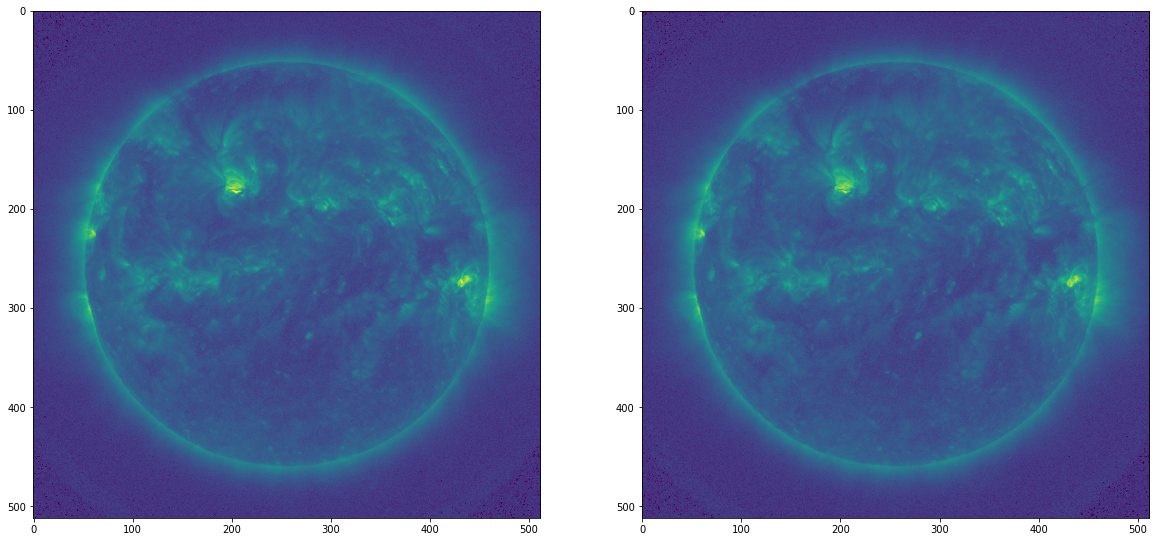

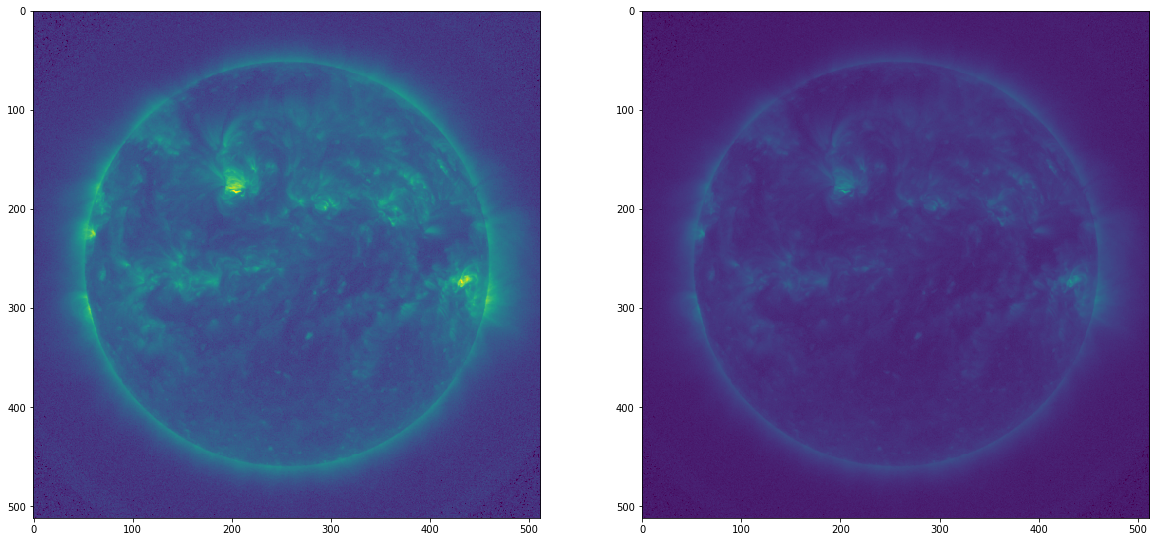

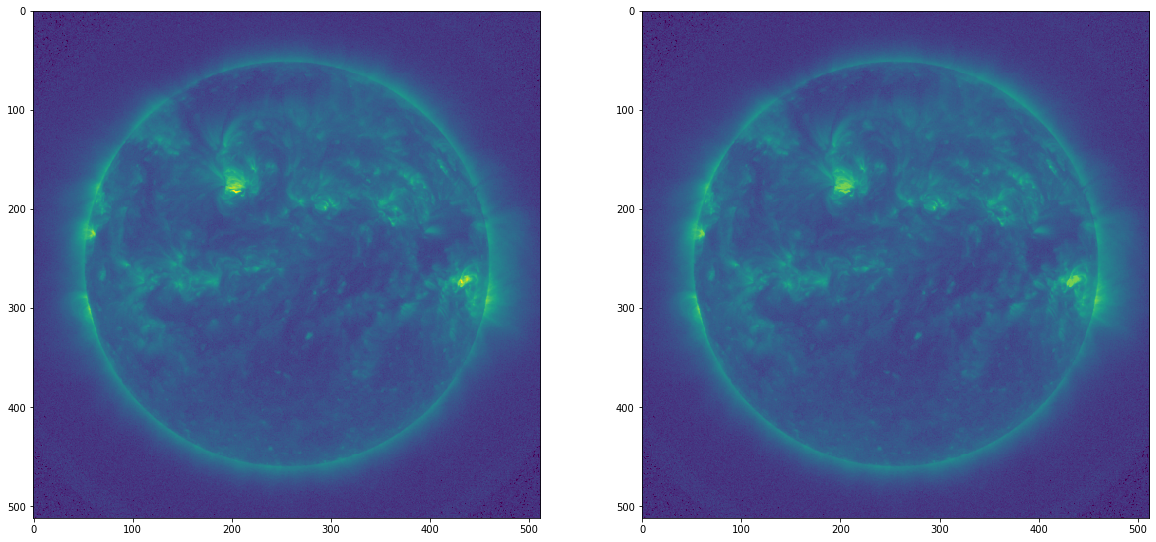

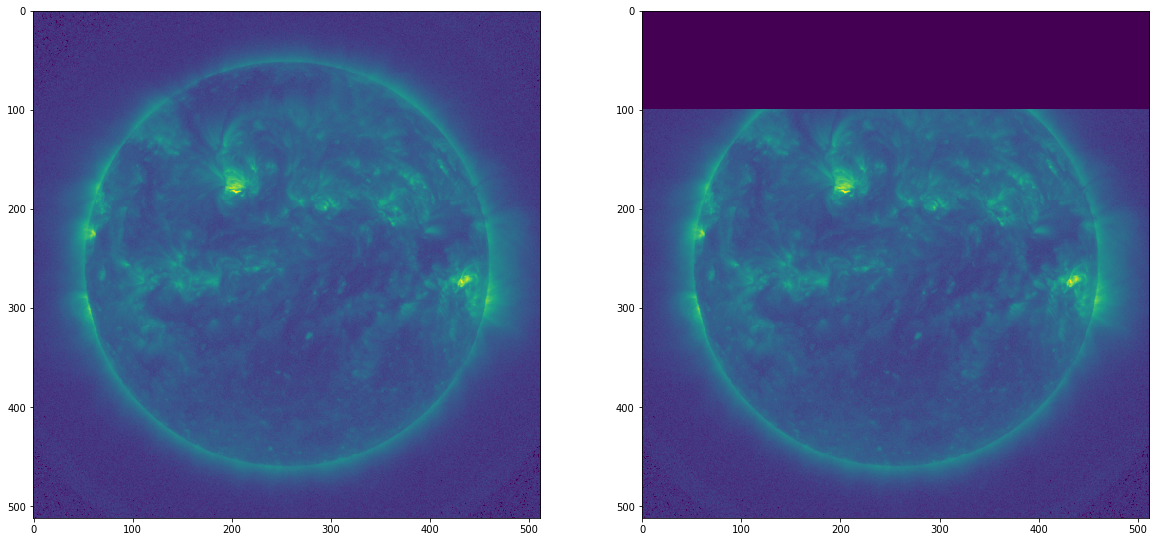

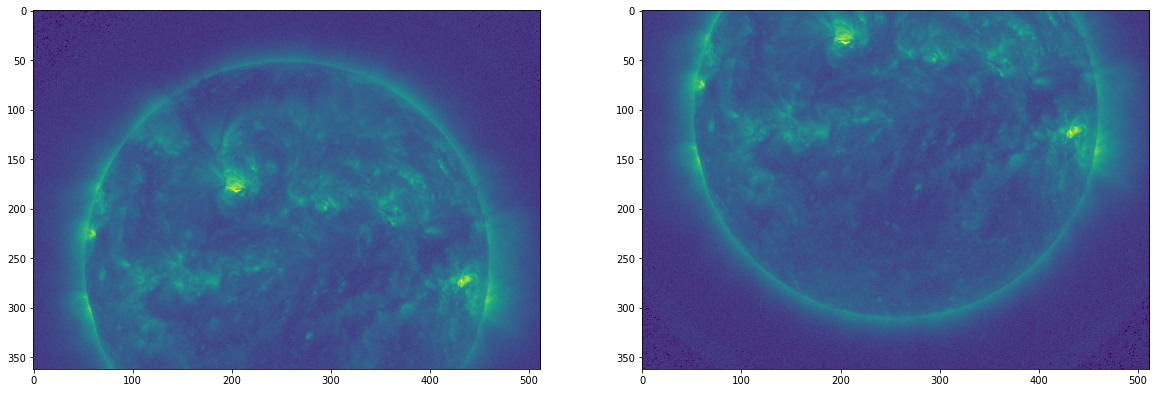

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
#plt.imshow(gt_uno[50,0,:,:].detach().numpy(),vmin=0, vmax=1)
#plt.imshow(gt_uno,vmin=0, vmax=1)
plt.imshow(gt_t1**0.3, clim=(0,5))

plt.subplot(1,2,2)
plt.imshow(gt_t2**0.3, clim=(0,5))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
#plt.imshow(gt_uno[50,0,:,:].detach().numpy(),vmin=0, vmax=1)
#plt.imshow(gt_uno,vmin=0, vmax=1)
plt.imshow(gt_t1**0.3, clim=(0,5))

plt.subplot(1,2,2)
#plt.imshow(gt_t2**0.3, clim=(0,5))
plt.imshow(gt_t1_dimmed**0.3, clim=(0,5))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gt_t1**0.3, clim=(0,5))

plt.subplot(1,2,2)
plt.imshow(gt_t1_saturated**0.3, clim=(0,5))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gt_t1**0.3, clim=(0,5))

plt.subplot(1,2,2)
plt.imshow(gt_t1_masked**0.3, clim=(0,5))


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gt_t1_shifted_down**0.3, clim=(0,5))

plt.subplot(1,2,2)
plt.imshow(gt_t1_shifted_up**0.3, clim=(0,5))


## Simple scalar metrics

In [33]:
from skimage.measure import compare_mse as mse
from skimage.measure import compare_nrmse as nrmse
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_psnr as psnr

In [34]:
print('GT to GT           = ', mse(gt_t1,gt_t1))
print('GT to dimmed       = ', mse(gt_t1,gt_t1_dimmed) )
print('GT to saturated    = ', mse(gt_t1,gt_t1_saturated))
print('GT to masked       = ', mse(gt_t1,gt_t1_masked))
print('Shifted up/down    = ', mse(gt_t1_shifted_up,gt_t1_shifted_down))
print('GT to GT at time 2 = ', mse(gt_t1,gt_t2))

GT to GT           =  0.0
GT to dimmed       =  41.459819011763734
GT to saturated    =  1.265715034088037
GT to masked       =  1.7887086280714013
Shifted up/down    =  104.0147124427288
GT to GT at time 2 =  1.0565391039842662


In [35]:
print('GT to GT           = ', nrmse(gt_t1,gt_t1))
print('GT to dimmed       = ', nrmse(gt_t1,gt_t1_dimmed) )
print('GT to saturated    = ', nrmse(gt_t1,gt_t1_saturated))
print('GT to masked       = ', nrmse(gt_t1,gt_t1_masked))
print('Shifted up/down    = ', nrmse(gt_t1_shifted_up,gt_t1_shifted_down))
print('GT to GT at time 2 = ', nrmse(gt_t1,gt_t2))

GT to GT           =  0.0
GT to dimmed       =  0.9000000000000001
GT to saturated    =  0.1572522172946293
GT to masked       =  0.18693843795194526
Shifted up/down    =  1.2620724737981859
GT to GT at time 2 =  0.14367182096610193


In [ ]:
#PSNR

In [36]:
print('GT to GT           = ', psnr(gt_t1,gt_t1))
print('GT to dimmed       = ', psnr(gt_t1,gt_t1_dimmed) )
print('GT to saturated    = ', psnr(gt_t1,gt_t1_saturated))
print('GT to masked       = ', psnr(gt_t1,gt_t1_masked))
print('Shifted up/down    = ', psnr(gt_t1_shifted_up,gt_t1_shifted_down))
print('GT to GT at time 2 = ', psnr(gt_t1,gt_t2))

ValueError: im_true has intensity values outside the range expected for its data type.  Please manually specify the data_range

In [37]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [38]:
print('GT to GT           = ', psnr(gt_t1,gt_t1))
print('GT to dimmed       = ', psnr(gt_t1,gt_t1_dimmed) )
print('GT to saturated    = ', psnr(gt_t1,gt_t1_saturated))
print('GT to masked       = ', psnr(gt_t1,gt_t1_masked))
print('Shifted up/down    = ', psnr(gt_t1_shifted_up,gt_t1_shifted_down))
print('GT to GT at time 2 = ', psnr(gt_t1,gt_t2))

GT to GT           =  100
GT to dimmed       =  31.954529589702677
GT to saturated    =  47.107444222116555
GT to masked       =  45.605407589962816
Shifted up/down    =  27.959855881000447
GT to GT at time 2 =  47.89194785338255


In [ ]:
#Mean absolute error

In [39]:
print('GT to GT           = ', mean_absolute_error(gt_t1,gt_t1))
print('GT to dimmed       = ', mean_absolute_error(gt_t1,gt_t1_dimmed) )
print('GT to saturated    = ', mean_absolute_error(gt_t1,gt_t1_saturated))
print('GT to masked       = ', mean_absolute_error(gt_t1,gt_t1_masked))
print('Shifted up/down    = ', mean_absolute_error(gt_t1_shifted_up,gt_t1_shifted_down))
print('GT to GT at time 2 = ', mean_absolute_error(gt_t1,gt_t2))

GT to GT           =  0.0
GT to dimmed       =  3.399535847173395
GT to saturated    =  0.013704144454095513
GT to masked       =  0.3257682848745276
Shifted up/down    =  5.2491544377981025
GT to GT at time 2 =  0.37419568091650035


In [ ]:
#SSIM

In [40]:
print('GT to GT           = ', ssim(gt_t1,gt_t1))
print('GT to dimmed       = ', ssim(gt_t1,gt_t1_dimmed) )
print('GT to saturated    = ', ssim(gt_t1,gt_t1_saturated))
print('GT to masked       = ', ssim(gt_t1,gt_t1_masked))
print('Shifted up/down    = ', ssim(gt_t1_shifted_up,gt_t1_shifted_down))
print('GT to GT at time 2 = ', ssim(gt_t1,gt_t2))

GT to GT           =  1.0
GT to dimmed       =  0.04620279841242435
GT to saturated    =  0.9996805274947091
GT to masked       =  0.8047878943672027
Shifted up/down    =  0.006725888706377745
GT to GT at time 2 =  0.5109667290295593


In [ ]:
##CCL
#GT to GT is the absolute similarity, both MSE = 0 and SSIM = 1, as expected.
#The next MSE lowest value is for GT to GT at time 2, which is only 4th for SSIM.
#The next SSIM lowest value (closer to 0 above) is GT to saturated, which is 3rd for MSE
#The worst is the shifted images, for both MSE and SSIM.
#Masked and dimmed: masked does better than dimmed for SSIM. Probably depends on how much of it is covered.

If not going through sci-kit, these are the definitions

In [41]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def rmse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    err = math.sqrt(err)
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [42]:
print('GT to GT           = ', rmse(gt_t1,gt_t1))
print('GT to dimmed       = ', rmse(gt_t1,gt_t1_dimmed) )
print('GT to saturated    = ', rmse(gt_t1,gt_t1_saturated))
print('GT to masked       = ', rmse(gt_t1,gt_t1_masked))
print('Shifted up/down    = ', rmse(gt_t1_shifted_up,gt_t1_shifted_down))
print('GT to GT at time 2 = ', rmse(gt_t1,gt_t2))

GT to GT           =  0.0
GT to dimmed       =  6.438929958600554
GT to saturated    =  1.1250400144386141
GT to masked       =  1.3374261206030789
Shifted up/down    =  10.198760338527855
GT to GT at time 2 =  1.0278808802503654


## HISTOGRAM ANALYSIS

In [43]:
import pandas as pd

In [67]:
hist_gt_1             =np.histogram(pd.Series(np.ravel(gt_t1)),bins=100)
hist_gt_2             =np.histogram(pd.Series(np.ravel(gt_t2)),bins=100)
hist_gt_1_dimmed      =np.histogram(pd.Series(np.ravel(gt_t1_dimmed)),bins=100)
hist_gt_1_saturated   =np.histogram(pd.Series(np.ravel(gt_t1_saturated)),bins=100)
hist_gt_1_masked      =np.histogram(pd.Series(np.ravel(gt_t1_masked)),bins=100)
hist_gt_1_shifted_up  =np.histogram(pd.Series(np.ravel(gt_t1_shifted_up)),bins=100)
hist_gt_1_shifted_down =np.histogram(pd.Series(np.ravel(gt_t1_shifted_down)),bins=100)

In [68]:
print("gt_1", hist_gt_1)
print("gt_2", hist_gt_2)
print("gt_dimmed", hist_gt_1_dimmed)
print("gt_saturated", hist_gt_1_saturated)
print("gt_masked", hist_gt_1_masked)
print("gt_shifted_up", hist_gt_1_shifted_up)
print("gt_shifted_down", hist_gt_1_shifted_down)

gt_1 (array([171343,  55362,  17648,   7655,   3743,   2055,   1217,    776,
          541,    388,    310,    187,    141,    128,    106,     98,
           57,     43,     49,     31,     28,     29,     18,     19,
           18,     15,      9,     18,      7,     13,     11,      6,
           13,      8,     10,      2,      4,      5,      0,      4,
            3,      3,      1,      3,      1,      3,      1,      0,
            0,      0,      0,      2,      0,      1,      0,      1,
            0,      1,      0,      1,      2,      1,      0,      0,
            0,      0,      1,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      1,      0,      0,
            0,      0,      0,      1,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      1,      0,      0,
            0,      0,      0,      1]), array([  0.        ,   3.45136841,   6.90273682,  10.35410522,
        13.80547363,  17.25684204,  20

In [69]:
def np_hist_to_cv(np_histogram_output):
    counts, bin_edges = np_histogram_output
    return counts.ravel().astype('float32')

In [70]:
compare =cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1), cv2.HISTCMP_CORREL)
compare1=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1), cv2.HISTCMP_CHISQR)
compare2=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1), cv2.HISTCMP_INTERSECT)
compare3=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1), cv2.HISTCMP_BHATTACHARYYA)

In [71]:
print(compare,compare1,compare2,compare3)

1.0 0.0 262144.0 0.0


In [72]:
compare_dimmed =cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_dimmed), cv2.HISTCMP_CORREL)
compare1_dimmed=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_dimmed), cv2.HISTCMP_CHISQR)
compare2_dimmed=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_dimmed), cv2.HISTCMP_INTERSECT)
compare3_dimmed=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_dimmed), cv2.HISTCMP_BHATTACHARYYA)

In [73]:
print(compare_dimmed,compare1_dimmed,compare2_dimmed,compare3_dimmed)

1.0 0.0 262144.0 0.0


In [74]:
compare_saturated =cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_saturated), cv2.HISTCMP_CORREL)
compare1_saturated=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_saturated), cv2.HISTCMP_CHISQR)
compare2_saturated=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_saturated), cv2.HISTCMP_INTERSECT)
compare3_saturated=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_saturated), cv2.HISTCMP_BHATTACHARYYA)

In [75]:
print(compare_saturated,compare1_saturated,compare2_saturated,compare3_saturated)

0.9131823879711138 644238.5432039119 159771.0 0.33083543251390735


In [76]:
compare_masked =cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_masked), cv2.HISTCMP_CORREL)
compare1_masked=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_masked), cv2.HISTCMP_CHISQR)
compare2_masked=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_masked), cv2.HISTCMP_INTERSECT)
compare3_masked=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_1_masked), cv2.HISTCMP_BHATTACHARYYA)

In [77]:
print(compare_masked,compare1_masked,compare2_masked,compare3_masked)

0.9992713879060546 882.4185169693433 255021.0 0.02074147798087066


In [78]:
compare_shifted =cv2.compareHist(np_hist_to_cv(hist_gt_1_shifted_up),np_hist_to_cv(hist_gt_1_shifted_down), cv2.HISTCMP_CORREL)
compare1_shifted=cv2.compareHist(np_hist_to_cv(hist_gt_1_shifted_up),np_hist_to_cv(hist_gt_1_shifted_down), cv2.HISTCMP_CHISQR)
compare2_shifted=cv2.compareHist(np_hist_to_cv(hist_gt_1_shifted_up),np_hist_to_cv(hist_gt_1_shifted_down), cv2.HISTCMP_INTERSECT)
compare3_shifted=cv2.compareHist(np_hist_to_cv(hist_gt_1_shifted_up),np_hist_to_cv(hist_gt_1_shifted_down), cv2.HISTCMP_BHATTACHARYYA)

In [79]:
print(compare_shifted,compare1_shifted,compare2_shifted,compare3_shifted)

0.9964509035061352 2309.8369223941395 175546.0 0.0388916950719328


In [80]:
compare_t =cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_2), cv2.HISTCMP_CORREL)
compare1_t=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_2), cv2.HISTCMP_CHISQR)
compare2_t=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_2), cv2.HISTCMP_INTERSECT)
compare3_t=cv2.compareHist(np_hist_to_cv(hist_gt_1),np_hist_to_cv(hist_gt_2), cv2.HISTCMP_BHATTACHARYYA)

In [81]:
print(compare_t,compare1_t,compare2_t,compare3_t)

0.97818411504421 67369.80700505612 215947.0 0.15200599574047363


In [22]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

In [23]:
print(return_intersection(hist_gt_1[0],hist_gt_1[0]))

1.0


In [84]:
print(np.corrcoef(hist_gt_1[0],hist_gt_2[0]))

[[1.         0.99995539]
 [0.99995539 1.        ]]


In [ ]:
from scipy.spatial import distance as dist

In [111]:
from scipy.spatial import distance as dist
m=dist.euclidean(hist_gt_1[0],hist_gt_2[0])

In [112]:
print(m)

4040.9298434889956


## Azimuthal Average

In [9]:
from scipy import fftpack

In [10]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

In [11]:
# tests[50,0,:,:] with 50=batch number, 0=channel number, 

F1_uno = fftpack.fft2(gt_uno)
F2_uno = fftpack.fftshift(F1_uno)
psd2D_uno = np.abs(F2_uno)**2
psd1D_uno = azimuthalAverage(psd2D_uno)

F1_due = fftpack.fft2(gt_due)
F2_due = fftpack.fftshift(F1_due)
psd2D_due = np.abs(F2_due)**2
psd1D_due = azimuthalAverage(psd2D_due)

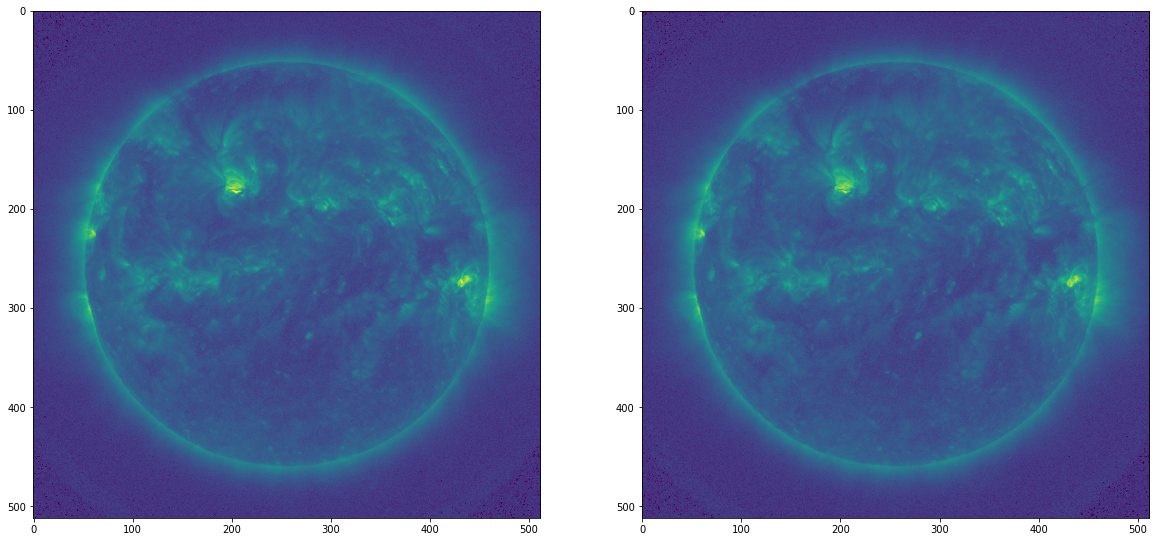

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
#plt.imshow(gt_uno[50,0,:,:].detach().numpy(),vmin=0, vmax=1)
#plt.imshow(gt_uno,vmin=0, vmax=1)
plt.imshow(gt_uno**0.3, clim=(0,5))

plt.subplot(1,2,2)
#plt.imshow(gt_uno[50,0,:,:].detach().numpy(),vmin=0, vmax=1)
#plt.imshow(gt_due,vmin=0, vmax=1)
plt.imshow(gt_due**0.3, clim=(0,5))

In [14]:
print(np.max(gt_uno**.3), np.max(gt_due**.3))

5.77294468023861 4.909912208643211


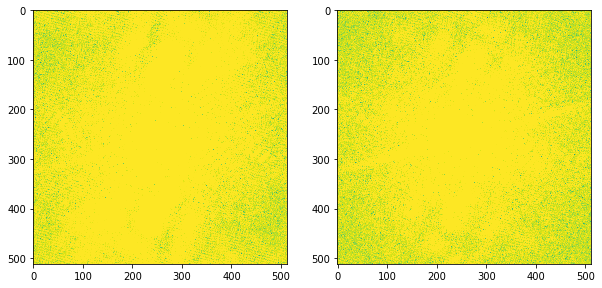

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(np.log10( psd2D_uno ),vmax=5,vmin=-5)
plt.subplot(1,2,2)
plt.imshow(np.log10( psd2D_due ),vmax=5,vmin=-5)

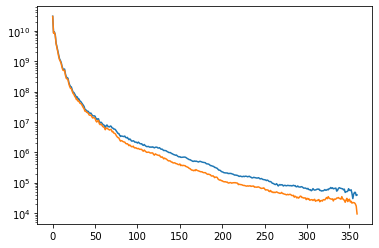

In [28]:
plt.subplot()
plt.semilogy(psd1D_uno)
plt.semilogy(psd1D_due)

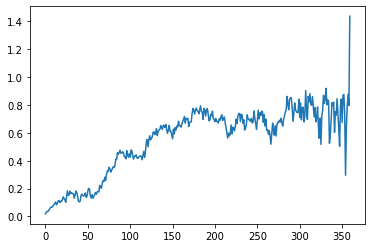

In [29]:
#print(np.log(psd1D_uno),np.log(psd1D_due))
plt.plot(np.abs(np.log(psd1D_uno)-np.log(psd1D_due)))